In [3]:
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

In [4]:
import pandas as pd
pd.set_option("display.max_columns",None)

In [5]:
WASTE_GENERATION_df = pd.read_csv("C:/Users/hp/Desktop/Projects/Business-Sustainability-through-Environmental-Impact-Analysis/Data/Waste Generation/municipal waste.csv")
WASTE_GENERATION_df.head()

,region,province,name,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [6]:
WASTE_GENERATION_df.isnull().mean()*100

region         0.000000
province       0.000000
name           0.138217
tc             0.000000
cres           1.197881
csor           1.543423
istat          0.000000
area           0.138217
pop            0.000000
alt            0.138217
isle           0.138217
sea            0.138217
pden           0.138217
wden           0.138217
urb            0.138217
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.794517
paper          0.575904
glass          0.760194
wood          25.224603
metal          5.666897
plastic        0.898411
raee           7.233356
texile        23.335637
other          3.132919
msw_so         0.000000
msw_un         0.000000
msw            0.000000
sor            0.000000
geo            6.565308
roads         10.205022
s_wteregio     6.565308
s_landfill     6.565308
gdp            8.891960
proads        10.205022
wage           6.565308
finance        8.891960
dtype: float64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ["region","province","name","istat","isle","sea","urb","fee","d_fee","sample","geo"]


<Axes: >

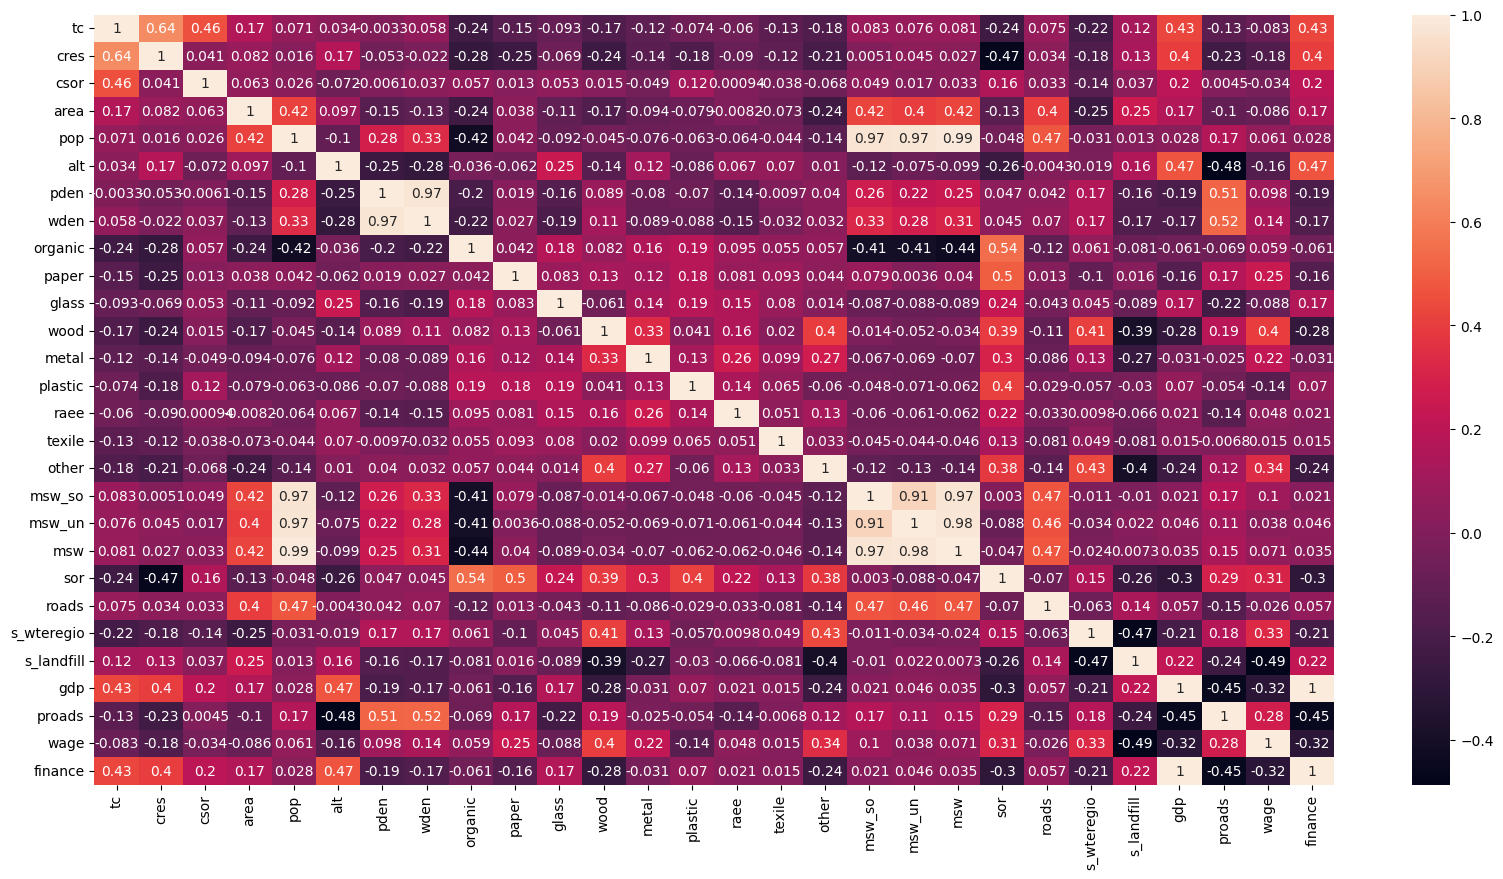

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(WASTE_GENERATION_df.drop(categorical_columns,axis=1).corr(),annot = True)

In [9]:
# wden-pden 

# pop-msw_so,msw_un,msw
# msw_so-msw_un,msw
# msw_un-msw_so,msw

# gdp-finance


<Axes: >

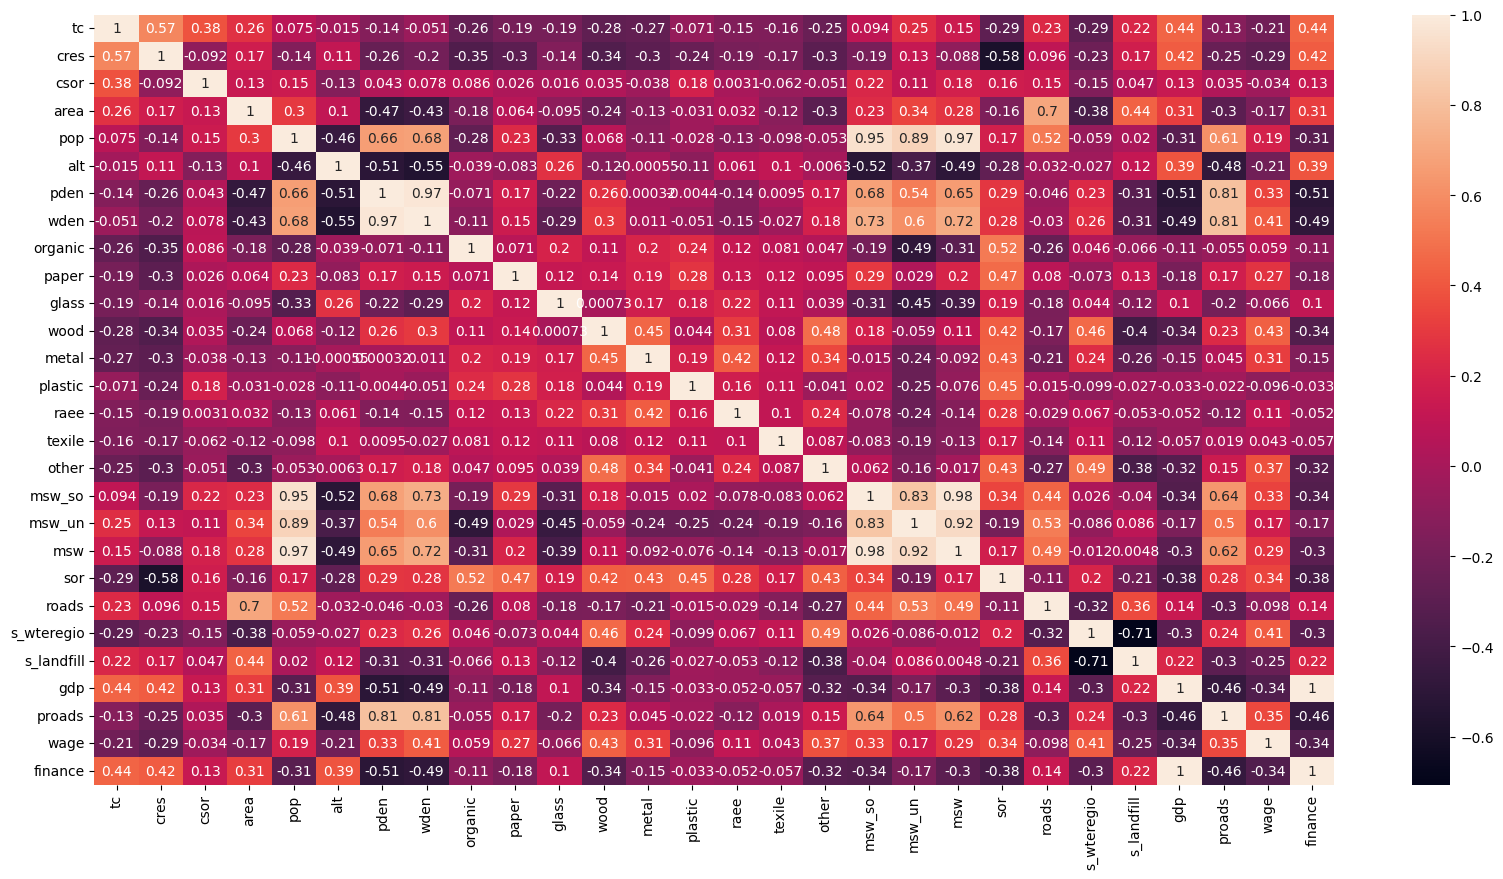

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(WASTE_GENERATION_df.drop(categorical_columns,axis=1).corr(method='spearman'),annot = True)

In [11]:
# proads-pden,wden

In [12]:
# we can remove proads feature can keep either pden or wden
# we can keep pop and remove msw_so,msw_un,msw
# we will remove gdp and keep finance

In [13]:
WASTE_GENERATION_df.drop(['proads','wden','msw_so','msw_un','msw','gdp'],axis=1,inplace=True)
WASTE_GENERATION_df.reset_index(drop=True,inplace=True)

In [14]:
WASTE_GENERATION_df.isnull().mean()*100

region         0.000000
province       0.000000
name           0.138217
tc             0.000000
cres           1.197881
csor           1.543423
istat          0.000000
area           0.138217
pop            0.000000
alt            0.138217
isle           0.138217
sea            0.138217
pden           0.138217
urb            0.138217
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.794517
paper          0.575904
glass          0.760194
wood          25.224603
metal          5.666897
plastic        0.898411
raee           7.233356
texile        23.335637
other          3.132919
sor            0.000000
geo            6.565308
roads         10.205022
s_wteregio     6.565308
s_landfill     6.565308
wage           6.565308
finance        8.891960
dtype: float64

In [15]:
null_df = WASTE_GENERATION_df.isnull().mean()*100

for col,nulls in zip(null_df.index,null_df.values):
    
    if nulls<=1.0:
        WASTE_GENERATION_df.dropna(subset=[col],inplace=True)

In [16]:
WASTE_GENERATION_df.isnull().mean()*100

region         0.000000
province       0.000000
name           0.000000
tc             0.000000
cres           1.175917
csor           1.505174
istat          0.000000
area           0.000000
pop            0.000000
alt            0.000000
isle           0.000000
sea            0.000000
pden           0.000000
urb            0.000000
fee            0.000000
d_fee          0.000000
sample         0.000000
organic       11.665099
paper          0.000000
glass          0.000000
wood          24.764817
metal          5.244591
plastic        0.000000
raee           6.937912
texile        23.000941
other          2.939793
sor            0.000000
geo            6.373471
roads         10.042333
s_wteregio     6.373471
s_landfill     6.373471
wage           6.373471
finance        8.748824
dtype: float64

In [17]:
WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().mean()*100

tc             0.000000
cres           1.175917
csor           1.505174
area           0.000000
pop            0.000000
alt            0.000000
pden           0.000000
organic       11.665099
paper          0.000000
glass          0.000000
wood          24.764817
metal          5.244591
plastic        0.000000
raee           6.937912
texile        23.000941
other          2.939793
sor            0.000000
roads         10.042333
s_wteregio     6.373471
s_landfill     6.373471
wage           6.373471
finance        8.748824
dtype: float64

In [18]:
WASTE_GENERATION_df.shape

(4252, 33)

In [19]:
def random_sample_replacement(dataset,features):
    
    for feature in features:
        
        N_null = dataset[feature].isnull().sum() 
        fill_values = dataset[feature].dropna().sample(N_null).values

        null_indexes = dataset[dataset[feature].isnull()].index.tolist()
        dataset.loc[null_indexes,feature] = fill_values
    
    
null_features_list = WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().mean().index
random_sample_replacement(WASTE_GENERATION_df,null_features_list)


In [20]:
WASTE_GENERATION_df.drop(categorical_columns,axis=1).isnull().sum()

tc            0
cres          0
csor          0
area          0
pop           0
alt           0
pden          0
organic       0
paper         0
glass         0
wood          0
metal         0
plastic       0
raee          0
texile        0
other         0
sor           0
roads         0
s_wteregio    0
s_landfill    0
wage          0
finance       0
dtype: int64

In [21]:
WASTE_GENERATION_df[categorical_columns].isnull().sum()

region        0
province      0
name          0
istat         0
isle          0
sea           0
urb           0
fee           0
d_fee         0
sample        0
geo         271
dtype: int64

In [22]:
WASTE_GENERATION_df['geo'].value_counts(dropna=False)

geo
3.0    2323
1.0    1147
2.0     508
NaN     271
1.5       3
Name: count, dtype: int64

In [23]:
WASTE_GENERATION_df['geo'].fillna(-1,inplace=True)
WASTE_GENERATION_df['geo'].value_counts(dropna=False)

geo
 3.0    2323
 1.0    1147
 2.0     508
-1.0     271
 1.5       3
Name: count, dtype: int64

In [24]:
WASTE_GENERATION_df[categorical_columns].isnull().sum()

region      0
province    0
name        0
istat       0
isle        0
sea         0
urb         0
fee         0
d_fee       0
sample      0
geo         0
dtype: int64

In [25]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(40, 40))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

col_names = WASTE_GENERATION_df.drop(categorical_columns,axis=1).columns

for i,col in enumerate(col_names):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    ax = plt.Subplot(fig, inner[0])
    sns.boxplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[1])
    sns.histplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    

In [ ]:
import numpy as np

def outlier_treatment(data,features):
    
    for feature in features:    
        q1 = np.percentile(data[feature],25)
        q3 = np.percentile(data[feature],75)
        
        iqr = q3-q1
        
        l = q1-(1.5*iqr)
        u = q3+(1.5*iqr)
        
    
        median = int(np.median(data[feature].values))
        mean = int(np.mean(data[feature].values))
        population = None
        
        if mean>median:
            population = data[(data[feature]>=np.percentile(data[feature],20)) & (data[feature]<=np.percentile(data[feature],45))]

        else:
            population = data[(data[feature]>=np.percentile(data[feature],60)) & (data[feature]<=np.percentile(data[feature],85))]

       
        data[feature] = np.where(data[feature]<l,population[feature].sample(1),
                                np.where(data[feature]>u,population[feature].sample(1),data[feature]))
      
features = WASTE_GENERATION_df.drop(categorical_columns,axis=1).columns        
outlier_treatment(WASTE_GENERATION_df,features)    
    

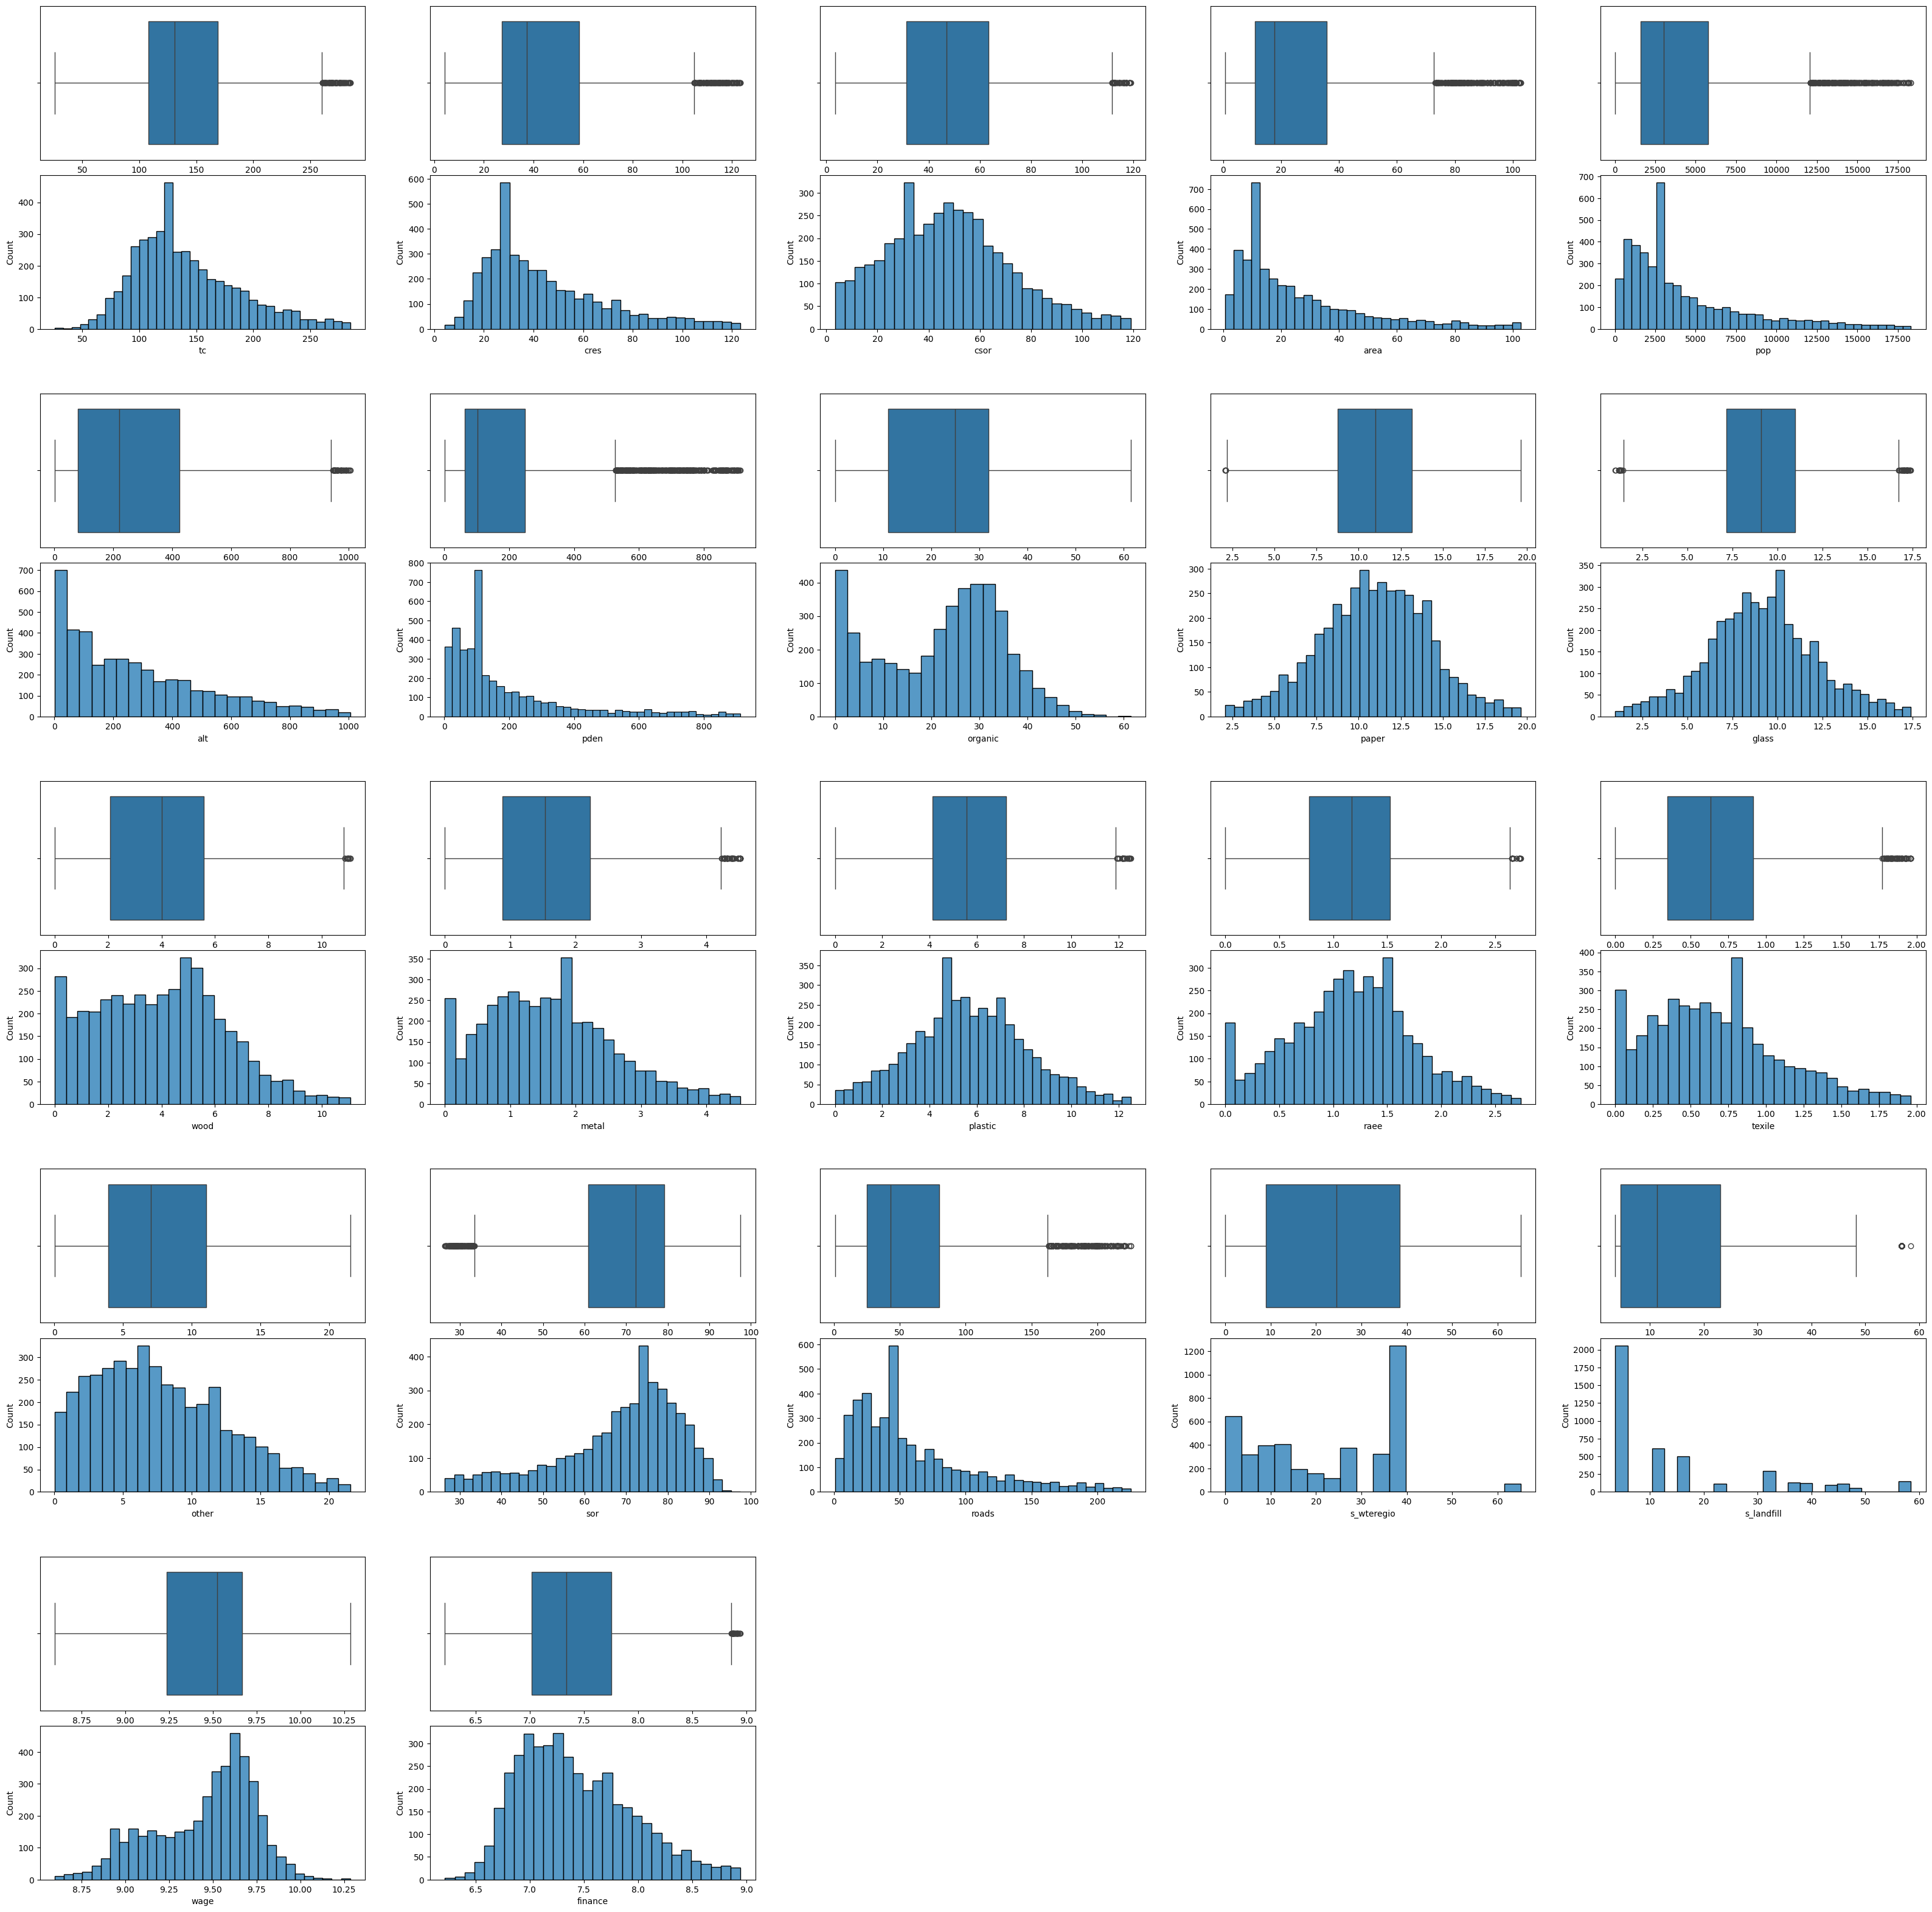

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(40, 40))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

col_names = WASTE_GENERATION_df.drop(categorical_columns,axis=1).columns

for i,col in enumerate(col_names):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    ax = plt.Subplot(fig, inner[0])
    sns.boxplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    
    ax = plt.Subplot(fig, inner[1])
    sns.histplot(ax=ax,x = WASTE_GENERATION_df[col])
    fig.add_subplot(ax)
    

In [ ]:
WASTE_GENERATION_df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4252 entries, 0 to 4334
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    4252 non-null   object 
 1   province  4252 non-null   object 
 2   name      4252 non-null   object 
 3   istat     4252 non-null   int64  
 4   isle      4252 non-null   float64
 5   sea       4252 non-null   float64
 6   urb       4252 non-null   float64
 7   fee       4252 non-null   object 
 8   d_fee     4252 non-null   int64  
 9   sample    4252 non-null   int64  
 10  geo       4252 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 527.7+ KB


In [ ]:
WASTE_GENERATION_df[categorical_columns] = WASTE_GENERATION_df[categorical_columns].astype('object')

In [ ]:
WASTE_GENERATION_df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 4252 entries, 0 to 4334
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   region    4252 non-null   object
 1   province  4252 non-null   object
 2   name      4252 non-null   object
 3   istat     4252 non-null   object
 4   isle      4252 non-null   object
 5   sea       4252 non-null   object
 6   urb       4252 non-null   object
 7   fee       4252 non-null   object
 8   d_fee     4252 non-null   object
 9   sample    4252 non-null   object
 10  geo       4252 non-null   object
dtypes: object(11)
memory usage: 527.7+ KB


In [ ]:
WASTE_GENERATION_df[categorical_columns].head()

,region,province,name,istat,isle,sea,urb,fee,d_fee,sample,geo
0,Emilia_Romagna,Ferrara,Comacchio,38006,0.0,1.0,2.0,PAYT,1,1,3.0
1,Emilia_Romagna,Ferrara,Lagosanto,38011,0.0,1.0,3.0,PAYT,1,1,3.0
2,Emilia_Romagna,Ferrara,Goro,38025,0.0,1.0,3.0,PAYT,1,1,3.0
3,Emilia_Romagna,Ferrara,Mesola,38014,0.0,1.0,3.0,PAYT,1,1,3.0
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,110005,0.0,1.0,2.0,STANDARD,0,0,1.0


In [ ]:
WASTE_GENERATION_df['region'].value_counts()

region
Lombardia                1199
Campania                  389
Emilia_Romagna            307
Veneto                    261
Toscana                   231
Sicilia                   208
Friuli_Venezia_Giulia     183
Lazio                     180
Liguria                   179
Calabria                  158
Abruzzo                   150
Trentino_Alto_Adige       150
Puglia                    126
Sardegna                  121
piemonte                  114
Marche                    102
Molise                     69
Basilicata                 65
Umbria                     59
Valle_d'Aosta               1
Name: count, dtype: int64

In [ ]:
WASTE_GENERATION_df.drop(['province','name','istat'],axis=1,inplace=True)

In [ ]:
[categorical_columns.remove(feature) for feature in ['province','name','istat']]
categorical_columns                         

['region', 'isle', 'sea', 'urb', 'fee', 'd_fee', 'sample', 'geo']

In [ ]:
WASTE_GENERATION_df[categorical_columns].head()

,region,isle,sea,urb,fee,d_fee,sample,geo
0,Emilia_Romagna,0.0,1.0,2.0,PAYT,1,1,3.0
1,Emilia_Romagna,0.0,1.0,3.0,PAYT,1,1,3.0
2,Emilia_Romagna,0.0,1.0,3.0,PAYT,1,1,3.0
3,Emilia_Romagna,0.0,1.0,3.0,PAYT,1,1,3.0
4,Puglia,0.0,1.0,2.0,STANDARD,0,0,1.0


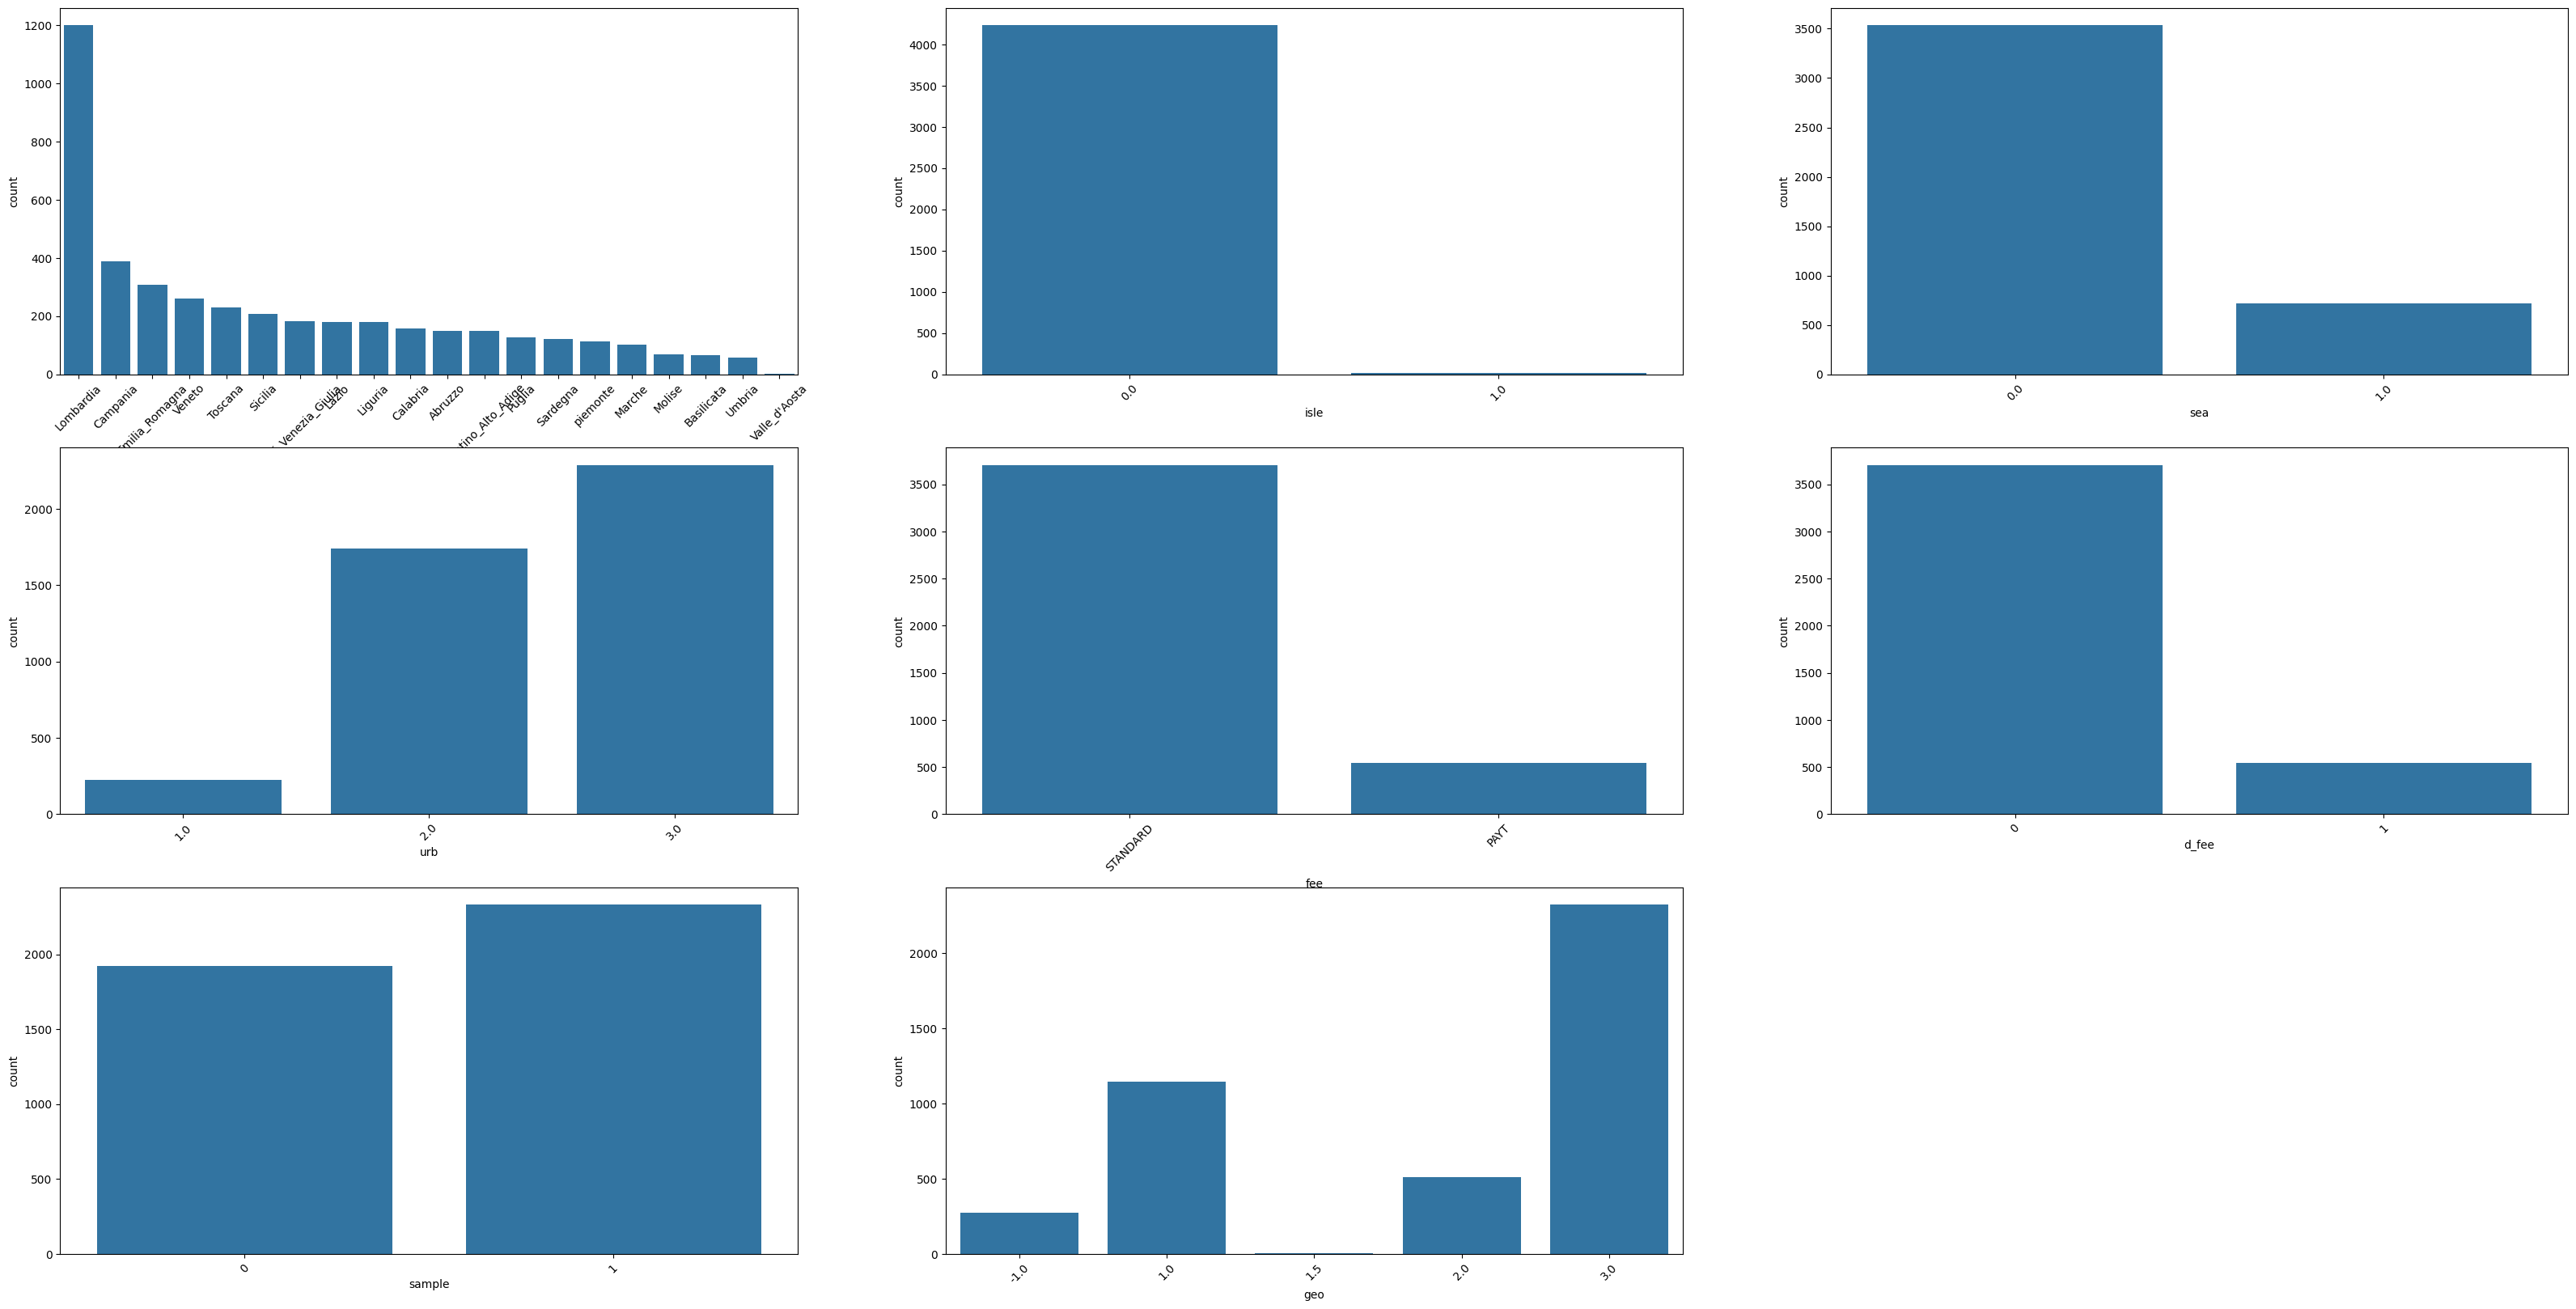

In [ ]:
plt.figure(figsize=(40,20))

for idx,col in enumerate(categorical_columns):
    plt.subplot(3,3,idx+1)
    sns.barplot(WASTE_GENERATION_df[col].value_counts())
    plt.xticks(rotation = 45)